In [ ]:
## Importing satelite images

In [2]:
!pip install geopandas

    100% |████████████████████████████████| 931kB 24.7MB/s ta 0:00:01
    100% |████████████████████████████████| 1.5MB 17.4MB/s ta 0:00:01
    100% |████████████████████████████████| 17.9MB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 10.8MB 4.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for munch ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install descartes

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install folium

    100% |████████████████████████████████| 92kB 2.6MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import pandas as pd
import geopandas as gpd
import folium
import os, shutil
from glob import glob

In [6]:
label_df = pd.read_csv("Fire_Prediction/study_area.csv", parse_dates=["ALARM_DATE", "CONT_DATE"])
label_df.tail()

X          Y ALARM_DATE  CONT_DATE  CAUSE        minx  \
934 -123.129416  41.957410 2017-08-10 2018-01-10    1.0 -123.260962   
935 -123.289808  41.970587 2017-08-11 2017-11-28    1.0 -123.308693   
936 -120.208866  38.824305 2017-08-11 2017-08-14   14.0 -120.210236   
937 -117.577833  33.432467 2017-06-28 2017-06-30    9.0 -117.588969   
938 -122.328469  41.433370 2016-05-19 2016-05-20    9.0 -122.331842   

          miny        maxx       maxy  \
934  41.873994 -123.011714  42.025643   
935  41.963763 -123.270366  41.978069   
936  38.822774 -120.207569  38.825822   
937  33.421134 -117.567590  33.443179   
938  41.429042 -122.324932  41.437794   

                                                coords  
934  [(-123.16235357591204, 41.97429019563638), (-1...  
935  [(-123.30488330805754, 41.96616010635459), (-1...  
936  [(-120.20756925443563, 38.823916868756854), (-...  
937  [(-117.56897743867438, 33.439482147245116), (-...  
938  [(-122.33068299055088, 41.43772946193435), (-1...

In [7]:
wrs = gpd.read_file('WRS2_descending.shp')

wrs.head()

AREA  PERIMETER  PR_  PR_ID  RINGS_OK  RINGS_NOK  PATH  ROW MODE  \
0  15.74326   26.98611  1.0    1.0         1          0    13    1    D   
1  14.55366   25.84254  2.0    2.0         1          0    13    2    D   
2  13.37247   24.20303  3.0    3.0         1          0    13    3    D   
3  12.26691   22.40265  4.0    4.0         1          0    13    4    D   
4  11.26511   20.64284  5.0    5.0         1          0    13    5    D   

   SEQUENCE   WRSPR      PR ACQDayL7 ACQDayL8  \
0      2233  013001  013001        1        9   
1      2234  013002  013002        1        9   
2      2235  013003  013003        1        9   
3      2236  013004  013004        1        9   
4      2237  013005  013005        1        9   

                                            geometry  
0  POLYGON ((-10.80341356392465 80.9888, -8.97406...  
1  POLYGON ((-29.24250366707619 80.18681161921363...  
2  POLYGON ((-24.04205646041896 79.12261247629547...  
3  POLYGON ((-36.66813132081753 77.46094098591608...  
4  POLYGON ((-44.11209517917457 76.93655561966702...

In [4]:

from shapely.geometry import Point

In [5]:
import numpy as np

In [18]:
# Get the center of the map
xy = np.asarray(pt.xy).squeeze()
center = list(xy[::-1])

# Select a zoom
zoom = 6

# Create the most basic OSM folium map
m = folium.Map(location=center, zoom_start=zoom, control_scale=True)

# Add the bounds GeoDataFrame in red
m.add_child(folium.GeoJson(pt.__geo_interface__, name='Area of Study', 
                           style_function=lambda x: {'color': 'red', 'alpha': 0}))

# Iterate through each Polygon of paths and rows intersecting the area
for i, row in wrs_intersection.iterrows():
    # Create a string for the name containing the path and row of this Polygon
    name = 'path: %03d, row: %03d' % (row.PATH, row.ROW)
    # Create the folium geometry of this Polygon 
    g = folium.GeoJson(row.geometry.__geo_interface__, name=name)
    # Add a folium Popup object with the name string
    g.add_child(folium.Popup(name))
    # Add the object to the map
    g.add_to(m)

folium.LayerControl().add_to(m)
m


In [8]:
s3_scenes = pd.read_csv('http://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz', compression='gzip', parse_dates=["acquisitionDate"])

In [9]:
s3_scenes.head(3)

productId               entityId  \
0  LC08_L1TP_149039_20170411_20170415_01_T1  LC81490392017101LGN00   
1  LC08_L1TP_012001_20170411_20170415_01_T1  LC80120012017101LGN00   
2  LC08_L1TP_012002_20170411_20170415_01_T1  LC80120022017101LGN00   

             acquisitionDate  cloudCover processingLevel  path  row   min_lat  \
0 2017-04-11 05:36:29.349932        0.00            L1TP   149   39  29.22165   
1 2017-04-11 15:14:40.001201        0.15            L1TP    12    1  79.51504   
2 2017-04-11 15:15:03.871058        0.38            L1TP    12    2  78.74882   

    min_lon   max_lat   max_lon  \
0  72.41205  31.34742  74.84666   
1 -22.06995  81.90314  -7.44339   
2 -29.24387  81.14549 -15.04330   

                                        download_url  
0  https://s3-us-west-2.amazonaws.com/landsat-pds...  
1  https://s3-us-west-2.amazonaws.com/landsat-pds...  
2  https://s3-us-west-2.amazonaws.com/landsat-pds...

In [253]:
# Empty list to add the images
bulk_list = []

for i, record in label_df.iloc[500:].iterrows():
    pt = Point(record["X"], record["Y"])
    wrs_intersection = wrs[wrs.intersects(pt)]
    paths, rows = wrs_intersection['PATH'].values, wrs_intersection['ROW'].values

    # Iterate through paths and rows
    for path, row in zip(paths, rows):

        # Filter the Landsat Amazon S3 table for images matching path, row, cloudcover and processing state.
        scenes = s3_scenes[(s3_scenes.path == path) & (s3_scenes.row == row) & 
                           (~s3_scenes.productId.str.contains('_T2')) &
                           (~s3_scenes.productId.str.contains('_RT')) & 
                           (s3_scenes['acquisitionDate'] >= record.ALARM_DATE) & 
                           (s3_scenes['acquisitionDate'] <= record.CONT_DATE)]
        
        print('Path:',path, 'Row:', row,  record.ALARM_DATE, ' till ', record.CONT_DATE, "Scenes : ", len(scenes))


        # If any scenes exists, select the one that have the minimum cloudCover.
        if len(scenes):
            scene = scenes.sort_values('cloudCover').iloc[0]
            # Add the selected scene to the bulk download list.
            scene = pd.concat([scene, record.T])
            bulk_list.append(scene)
print('Done')

Path: 43 Row: 34 2017-07-05 00:00:00  till  2017-07-05 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-09-24 00:00:00  till  2017-09-24 00:00:00 Scenes :  0
Path: 44 Row: 33 2017-09-24 00:00:00  till  2017-09-24 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-07-29 00:00:00  till  2017-07-30 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-07-08 00:00:00  till  2017-07-08 00:00:00 Scenes :  0
Path: 43 Row: 33 2017-07-17 00:00:00  till  2017-07-17 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-10-18 00:00:00  till  2017-10-18 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-06-21 00:00:00  till  2017-06-21 00:00:00 Scenes :  0
Path: 43 Row: 33 2017-07-18 00:00:00  till  2017-07-18 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-07-18 00:00:00  till  2017-07-18 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-07-12 00:00:00  till  2017-07-12 00:00:00 Scenes :  0
Path: 44 Row: 33 2017-07-12 00:00:00  till  2017-07-12 00:00:00 Scenes :  0
Path: 43 Row: 34 2017-06-11 00:00:00  till  2017-06-11 00:00:00 Scenes :  0
Path: 43 Row

Path: 40 Row: 36 2017-04-30 00:00:00  till  2017-05-02 00:00:00 Scenes :  1
Path: 40 Row: 37 2017-07-31 00:00:00  till  2017-08-03 00:00:00 Scenes :  0
Path: 40 Row: 37 2017-06-03 00:00:00  till  2017-06-03 00:00:00 Scenes :  0
Path: 40 Row: 36 2017-09-02 00:00:00  till  2017-09-06 00:00:00 Scenes :  0
Path: 40 Row: 36 2017-08-14 00:00:00  till  2017-08-20 00:00:00 Scenes :  0
Path: 40 Row: 36 2017-08-13 00:00:00  till  2017-08-14 00:00:00 Scenes :  0
Path: 40 Row: 37 2017-10-23 00:00:00  till  2017-10-23 00:00:00 Scenes :  0
Path: 40 Row: 36 2017-05-21 00:00:00  till  2017-05-21 00:00:00 Scenes :  0
Path: 41 Row: 37 2017-08-19 00:00:00  till  2017-08-19 00:00:00 Scenes :  0
Path: 40 Row: 37 2017-08-19 00:00:00  till  2017-08-19 00:00:00 Scenes :  0
Path: 41 Row: 36 2017-09-25 00:00:00  till  2017-10-01 00:00:00 Scenes :  1
Path: 40 Row: 37 2017-09-25 00:00:00  till  2017-10-01 00:00:00 Scenes :  0
Path: 41 Row: 36 2017-10-09 00:00:00  till  2017-10-17 00:00:00 Scenes :  3
Path: 40 Row

KeyboardInterrupt: 

In [17]:
bulk_list[0]

productId                   LC08_L1TP_041035_20160926_20170220_01_T1
entityId                                       LC80410352016270LGN01
acquisitionDate                           2016-09-26 18:28:10.061167
cloudCover                                                      0.37
processingLevel                                                 L1TP
path                                                              41
row                                                               35
min_lat                                                      34.9563
min_lon                                                     -119.203
max_lat                                                      37.0862
max_lon                                                     -116.598
download_url       https://s3-us-west-2.amazonaws.com/landsat-pds...
X                                                           -118.699
Y                                                            36.7468
ALARM_DATE                        

In [19]:
bulk_list[0]["download_url"].replace('index.html', f"{bulk_list[0]['productId']}_B4.TIF")

'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/041/035/LC08_L1TP_041035_20160926_20170220_01_T1/LC08_L1TP_041035_20160926_20170220_01_T1_B4.TIF'

In [20]:
band = 4
bulk_list[0]["download_url"].replace("index.html", f"{bulk_list[0]['productId']}_B{band}.TIF")

'https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/041/035/LC08_L1TP_041035_20160926_20170220_01_T1/LC08_L1TP_041035_20160926_20170220_01_T1_B4.TIF'

In [43]:

entity_dir = "Crimson_Red_Sky"
os.makedirs(entity_dir, exist_ok=True)

In [44]:
import requests

for band in [4, 3, 2, 5]:
    file_name = bulk_list[0]["download_url"].replace("index.html", f"{bulk_list[0]['productId']}_B{band}.TIF")
    response = requests.get(file_name, stream=True)
    print(f"Downloading {bulk_list[0]['productId']}_B{band}.TIF")                                               
                                                     
    # If the response status code is fine (200)
    if response.status_code == 200:
        with open(f"{entity_dir}/{bulk_list[0]['productId']}_B{band}.TIF", 'wb') as output:
                shutil.copyfileobj(response.raw, output)
    del response
                  


In [171]:
response = requests.get("https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/041/035/LC08_L1TP_041035_20160926_20170220_01_T1/LC08_L1TP_041035_20160926_20170220_01_T1_B4.TIF.ovr" , stream = True)

In [23]:
red = rasterio.open(bulk_list[0]["download_url"].replace("index.html", f"{bulk_list[0]['productId']}_B{band}.TIF"))

In [192]:
red = rasterio.open("Crimson_Red_Sky/LC08_L1TP_041035_20160926_20170220_01_T1_B4.TIF")
green = rasterio.open("Crimson_Red_Sky/LC08_L1TP_041035_20160926_20170220_01_T1_B3.TIF")
blue = rasterio.open("Crimson_Red_Sky/LC08_L1TP_041035_20160926_20170220_01_T1_B2.TIF")
nir  = rasterio.open("Crimson_Red_Sky/LC08_L1TP_041035_20160926_20170220_01_T1_B5.TIF")

In [229]:
X, Y = label_df[label_df["Label"] == 1].iloc[0][["X", "Y"]]
X, Y

(-118.91052456696215, 34.08632698397082)

In [25]:
import pyproj

In [26]:
# Use pyproj to convert point coordinates
utm = pyproj.Proj(red.crs) # Pass CRS of image from rasterio
lonlat = pyproj.Proj(init='epsg:4326')

lon,lat = bulk_list[0][["X", "Y"]]
east,north = pyproj.transform(lonlat, utm, lon, lat)
row, col = red.index(east, north)
row, col

(1286, 1470)

In [64]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Polygon

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init=red.crs.data["init"])) # destination coordinate system

g2 = transform(project, Polygon(eval(bulk_list[0]["coords"])))  # apply projection

In [174]:
g2_px = Polygon([red.index(coord[0], coord[1]) for coord in list(zip(*g2.exterior.xy))])

from rasterio import features
shapes = [(g2_px, red.read(1).max()//3)]
shapes

[(<shapely.geometry.polygon.Polygon at 0x7fcf60293860>, 11832)]

In [175]:
gdf = gpd.GeoDataFrame( geometry=[g2_px])
gdf

geometry
0  POLYGON ((1275 1462, 1273 1464, 1271 1465, 127...

In [176]:
from rasterio.enums import MergeAlg

In [219]:
burned = features.rasterize(shapes=shapes, fill=np.nan, merge_alg= MergeAlg.add, out=red.read(1))

poly = list(zip(*[np.add(g2_px.exterior.xy[0], -row + 250), np.add(g2_px.exterior.xy[1], -col + 250)]))

[(239.0, 242.0),
 (237.0, 244.0),
 (235.0, 245.0),
 (234.0, 247.0),
 (233.0, 250.0),
 (233.0, 252.0),
 (232.0, 253.0),
 (233.0, 254.0),
 (233.0, 254.0),
 (234.0, 253.0),
 (236.0, 253.0),
 (238.0, 252.0),
 (240.0, 251.0),
 (245.0, 253.0),
 (250.0, 256.0),
 (250.0, 256.0),
 (251.0, 257.0),
 (251.0, 257.0),
 (252.0, 258.0),
 (254.0, 259.0),
 (256.0, 260.0),
 (258.0, 261.0),
 (259.0, 260.0),
 (261.0, 257.0),
 (263.0, 253.0),
 (264.0, 251.0),
 (265.0, 248.0),
 (262.0, 247.0),
 (259.0, 246.0),
 (256.0, 246.0),
 (248.0, 243.0),
 (242.0, 242.0),
 (239.0, 242.0)]

In [220]:
subset = burned[row - 250 : row + 250 , col - 250 : col + 250]

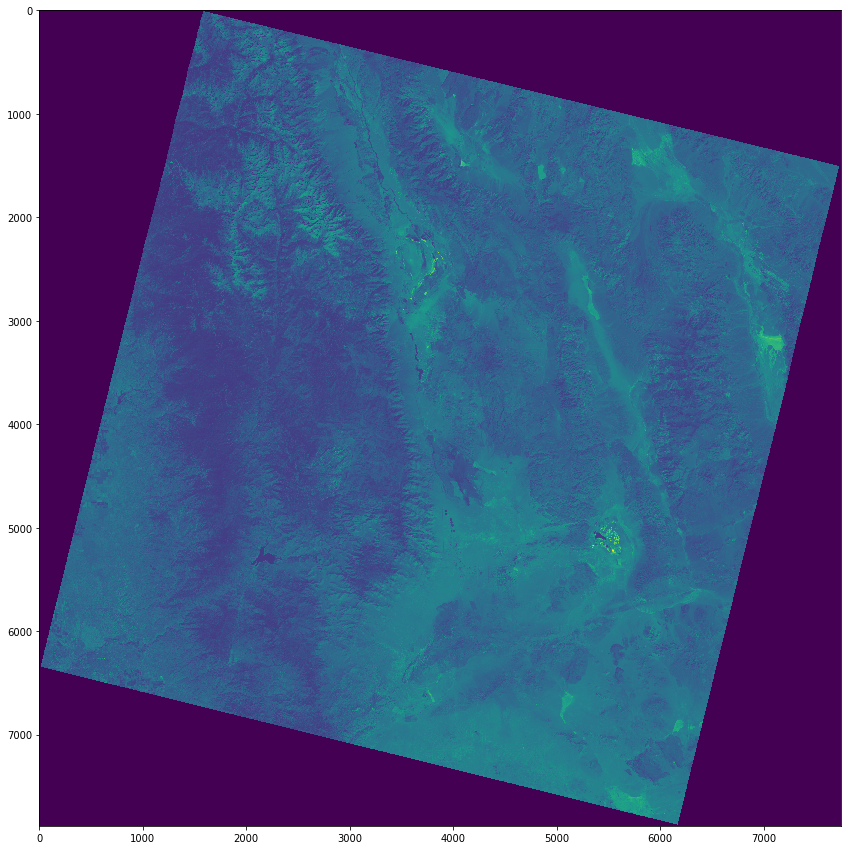

In [221]:
plt.figure(figsize=(15, 15))

show(burned)

In [227]:
subset = burned[row - 250 : row + 250 , col - 250 : col + 250]
with rasterio.open("crimson_red_sky.png", 'w',  driver='PNG',
        count=1,
        dtype=rasterio.uint16, width=500,
        height=500) as out:

    out.write_band(1, subset)
    


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/rasterio/__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


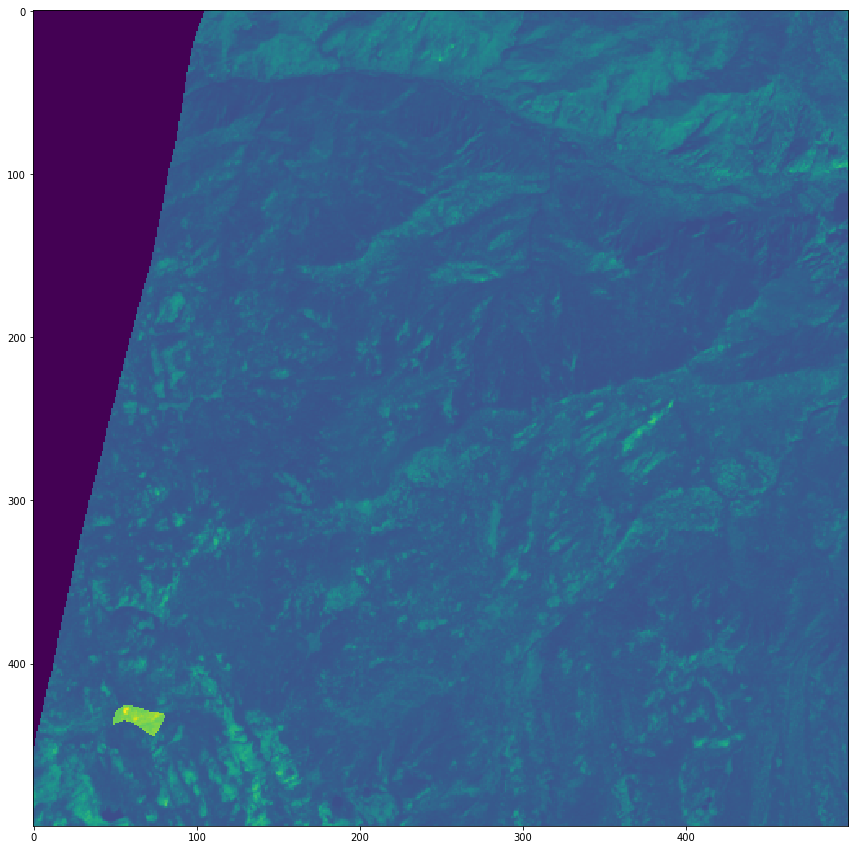

In [223]:
plt.figure(figsize=(15, 15))

show(subset)

In [233]:
east, north, lat, lon, red.bounds

(323733.63084311323,
 3773375.1980703734,
 34.08632698397082,
 -118.91052456696215,
 BoundingBox(left=304185.0, bottom=3870285.0, right=536715.0, top=4106715.0))

In [ ]:
(east  - red.bounds.left) //30, (red.bounds.top - north ) //30

Text(0.5,0,'Column #')

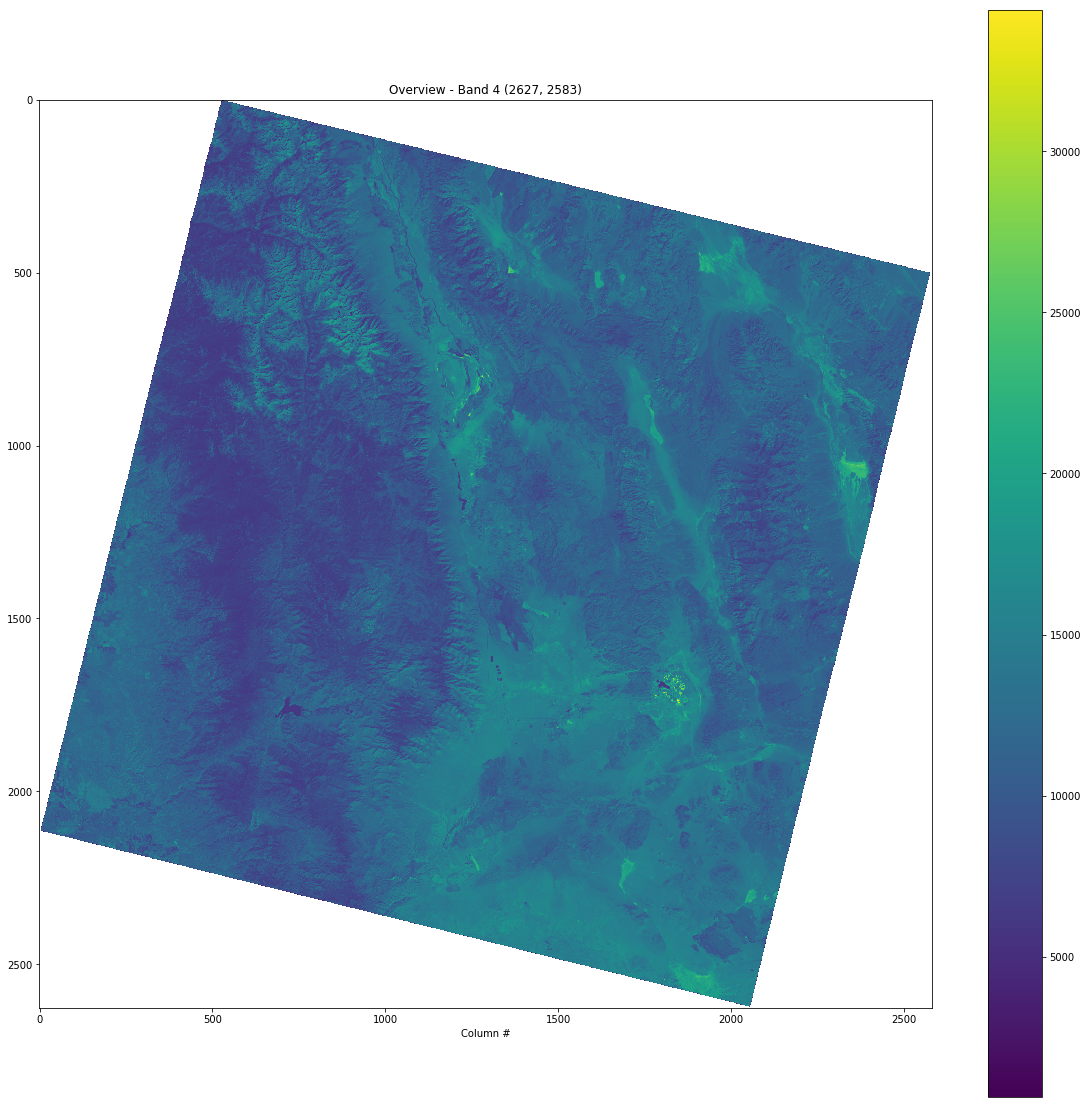

In [191]:
%matplotlib inline
# Open the COG
oviews = red.overviews(1)

# Retrieve the smallest thumbnail
oview = oviews[0]
thumbnail = red.read(1, out_shape=(1, int(red.height // oview), int(red.width // oview)))

# Convert the values into float
thumbnail = thumbnail.astype('f4')

# Convert 0 values to NaNs
thumbnail[thumbnail==0] = np.nan
plt.figure(figsize = (20, 20))

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')


In [254]:
bulk_frame = pd.concat(bulk_list, 1).T
bulk_frame.tail()

productId               entityId  \
19  LC08_L1TP_042034_20170904_20170916_01_T1  LC80420342017247LGN00   
20  LC08_L1TP_042034_20170904_20170916_01_T1  LC80420342017247LGN00   
21  LC08_L1TP_043034_20170810_20170824_01_T1  LC80430342017222LGN00   
22  LC08_L1TP_042034_20170702_20170715_01_T1  LC80420342017183LGN00   
23  LC08_L1TP_045033_20170808_20170823_01_T1  LC80450332017220LGN00   

               acquisitionDate cloudCover processingLevel path row  min_lat  \
19  2017-09-04 18:33:49.668349      79.29            L1TP   42  34   36.369   
20  2017-09-04 18:33:49.668349      79.29            L1TP   42  34   36.369   
21  2017-08-10 18:39:55.382556       0.88            L1TP   43  34  36.3929   
22  2017-07-02 18:33:30.087567       4.74            L1TP   42  34  36.3664   
23  2017-08-08 18:51:52.451632      41.85            L1TP   45  33  37.8267   

    min_lon  max_lat                        ...                          \
19 -120.384  38.5124                        ...                           
20 -120.384  38.5124                        ...                           
21 -121.864  38.5339                        ...                           
22 -120.381  38.5125                        ...                           
23 -124.579  39.9536                        ...                           

          X        Y           ALARM_DATE            CONT_DATE CAUSE     minx  \
19 -119.835  37.4044  2017-09-03 00:00:00  2017-09-09 00:00:00    10 -119.846   
20 -119.467  37.2369  2017-09-03 00:00:00  2017-09-13 00:00:00    11  -119.48   
21 -120.114   37.572  2017-07-16 00:00:00  2017-08-31 00:00:00     9 -120.259   
22 -119.946  37.3707  2017-06-28 00:00:00  2017-07-06 00:00:00    10 -119.971   
23 -122.789  38.9444  2017-08-08 00:00:00  2017-08-09 00:00:00    14 -122.796   

       miny     maxx     maxy  \
19    37.39 -119.826  37.4154   
20  37.2208 -119.453  37.2515   
21  37.4041 -119.984  37.6957   
22  37.3644 -119.926  37.3751   
23  38.9425 -122.782  38.9465   

                                               coords  
19  [(-119.8341189227251, 37.41433982778663), (-11...  
20  [(-119.46577759652196, 37.231066854122325), (-...  
21  [(-120.03658782344716, 37.62942307293962), (-1...  
22  [(-119.96512049111533, 37.37351665127749), (-1...  
23  [(-122.79563155965566, 38.94361160663044), (-1...  

[5 rows x 22 columns]

In [255]:
d = json.load(open("Labelme.json", "r"))

In [256]:
# Import requests and beautiful soup
import requests
from rasterio import features
import copy
import base64
try:
    import io
except ImportError:
    import io as io


# For each row

entity_dir = "Crimson_Red_Sky"
os.makedirs(entity_dir, exist_ok=True)

for i, record in bulk_frame.iterrows():
    print('EntityId:', record.productId)
    with rasterio.open(record.download_url.replace('index.html', f"{record.productId}_B4.TIF")) as red:
        
        # Get Reference system of Landsat image from rasterio
        utm = pyproj.Proj(red.crs) 
        print(red.crs)
        lonlat = pyproj.Proj(init='epsg:4326')

        lon,lat = record["X"], record["Y"]
        
        print(lon, lat)
        
        #Project Fire centroid lat lon values into projected coordinates as east, north (UTM - in m)
        east,north = pyproj.transform(lonlat, utm, lon, lat)
        
        print(east, north)
        
        #get pixel values at the centroid corrsponding to projected coordinates
        row, col = red.index(east, north)
        
        #Project Fire Perimeter coordinates into UTM coorindates (m)
        project = partial(
            pyproj.transform,
            pyproj.Proj(init='epsg:4326'), # source coordinate system
            pyproj.Proj(init=red.crs.data["init"])) # destination coordinate system

        g2 = transform(project, Polygon(eval(record.coords)))  # apply projection
        
        #Get pixel coordinates of fire perimeter
        g2_px = Polygon([red.index(coord[0] - col + 250 , coord[1] - row + 250) for coord in list(zip(*g2.exterior.xy))])
        
        #Assign burn values for features in g2
        shapes = [(g2_px, red.read(1).max()//3)]
        burned = features.rasterize(shapes=shapes, fill=np.nan, merge_alg= MergeAlg.add, out=red.read(1))

        poly = list(zip(*[np.add( g2_px.exterior.xy[0] , - row + 250) , np.add(g2_px.exterior.xy[1], - col + 250)]))
        subset = burned[row - 250 : row + 250 , col - 250 : col + 250]
        with rasterio.open(f"{entity_dir}/{record.productId}.png", 'w',  driver='PNG',
                count=1,
                dtype=rasterio.uint16, width=500,
                height=500) as out:
            

            out.write_band(1, subset)
        with open(f"{entity_dir}/{record.productId}.png", "rb") as image:
            encoded_string = base64.b64encode(image.read())
        
        e = copy.deepcopy(d)
       
        label = "Non Fire Burnt"
       
        e["shapes"][0]['label'] = label
        e["shapes"][0]['points'] = poly
        e['imageData'] = encoded_string.decode('ascii')
        e['imageWidth'] = 500
        e['imageHeight'] = 500
        e['imagePath'] = f"{entity_dir}/{record.productId}.png"
        
        json.dump(e, open(f"{entity_dir}/json/{record.productId}.json", "w"))        
        
print('Done')

EntityId: LC08_L1TP_043035_20170709_20170710_01_T1
EPSG:32610
-120.48180460103708 35.43860646917922
728580.9047729429 3924598.2984227184


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/rasterio/__init__.py:225: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


EntityId: LC08_L1TP_042036_20170718_20170728_01_T1
EPSG:32611
-120.27540834412466 34.969843557690055
200947.6438708295 3874601.189861879
EntityId: LC08_L1TP_043035_20170927_20171013_01_T1
EPSG:32610
-120.64743921927399 35.299906364186256
713908.983114843 3908840.8850293616
EntityId: LC08_L1TP_045031_20170621_20170630_01_T1
EPSG:32610
-122.38973125505971 41.92113931181037
550603.4652968228 4641200.527643275
EntityId: LC08_L1TP_045031_20170925_20171013_01_T1
EPSG:32610
-121.82742345516796 40.98059166349858
598645.3820683034 4537264.576878036
EntityId: LC08_L1TP_044032_20170918_20170929_01_T1
EPSG:32610
-121.82742345516796 40.98059166349858
598645.3820683034 4537264.576878036
EntityId: LC08_L1TP_040036_20170501_20170515_01_T1
EPSG:32611
-117.30003793725584 33.99759404412603
472291.3179158974 3761929.77735917
EntityId: LC08_L1TP_041036_20170929_20171013_01_T1
EPSG:32611
-117.65773927816923 33.86233603222494
439160.8836733787 3747086.8243509782
EntityId: LC08_L1TP_041036_20171015_20171024_0

In [11]:
!pip install rasterio

    100% |████████████████████████████████| 19.7MB 1.6MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
import rasterio
from rasterio.transform import from_origin
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

In [19]:
url = "https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/041/035/LC08_L1TP_041035_20160926_20170220_01_T1/LC08_L1TP_041035_20160926_20170220_01_T1_B{}.TIF"
with rasterio.open(url.format(4)) as band4:
    with rasterio.open(url.format(3)) as band3:
        with rasterio.open(url.format(2)) as band2:
            with rasterio.open(url.format(8)) as band8:
                r = band4.read(1)
                g = band3.read(1)
                b = band2.read(1)
                p = band8.read(1)



In [28]:
with rasterio.open(
    "crimson_red_sky.tif",'w', driver='GTiff',
    width=band4.shape[1],height=band4.shape[0],
    count=3,dtype=np.uint16,
    nodata=0,
    transform=band4.transform,
    photometric='RGB',
    crs=band4.crs) as dst:
    for k, arr in [(1, r), (2, g), (3, b)]:
        dst.write_band(k, arr)

In [24]:
band4.shape

(7881, 7751)

In [160]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    norm = ((array - array_min)/(array_max - array_min))
    return norm

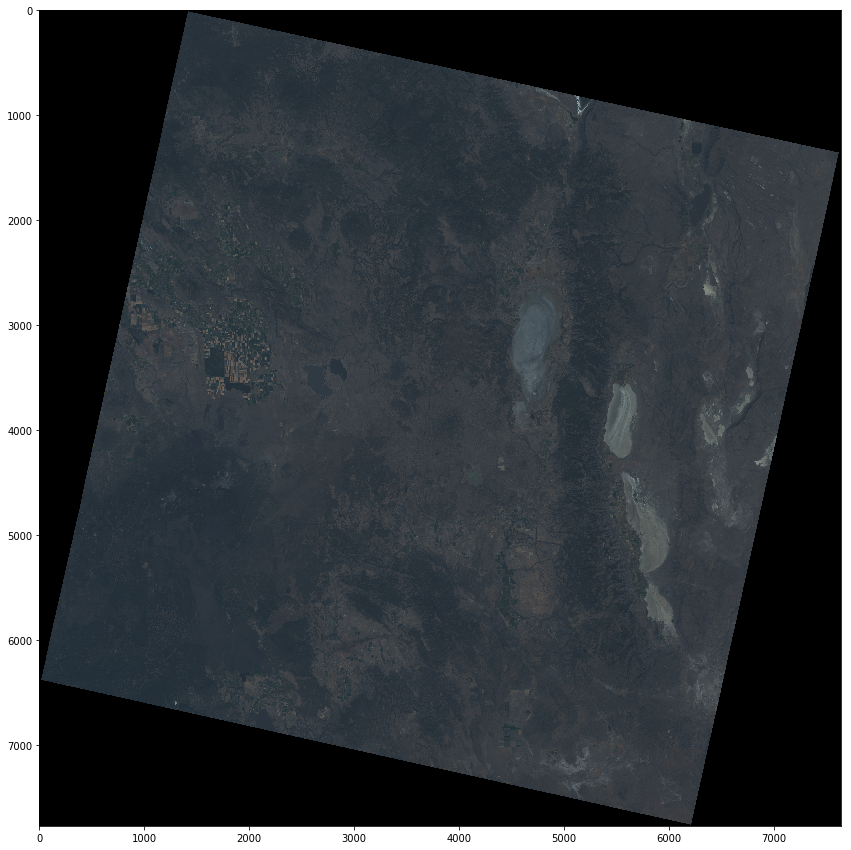

In [36]:
rgb = np.dstack((redn, greenn, bluen))
plt.figure(figsize = (15, 15))
plt.imshow(rgb)

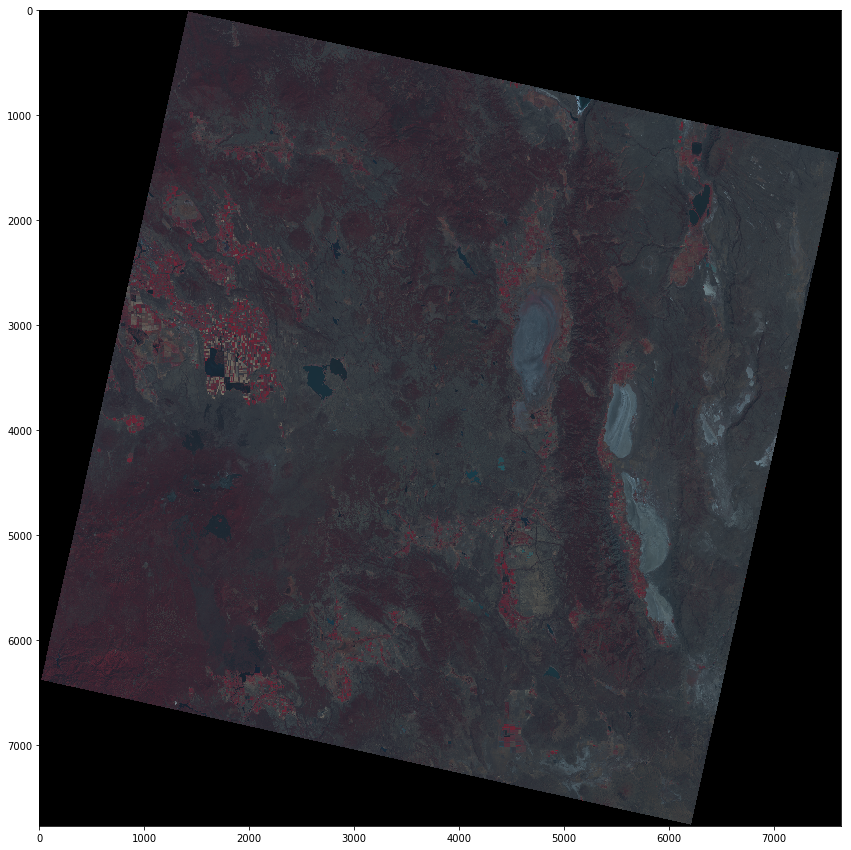

In [73]:
rgb = np.dstack((nirn, redn, greenn))
plt.figure(figsize = (15, 15))
plt.imshow(rgb)

In [64]:
red = rasterio.open("Images/LC08_L1TP_045031_20160821_20170222_01_T1_B4.TIF").read()
green = rasterio.open("Images/LC08_L1TP_045031_20160821_20170222_01_T1_B3.TIF").read()
blue = rasterio.open("Images/LC08_L1TP_045031_20160821_20170222_01_T1_B2.TIF").read()
nir = rasterio.open("Images/LC08_L1TP_045031_20160821_20170222_01_T1_B5.TIF").read()

In [65]:
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)
nirn = normalize(nir)

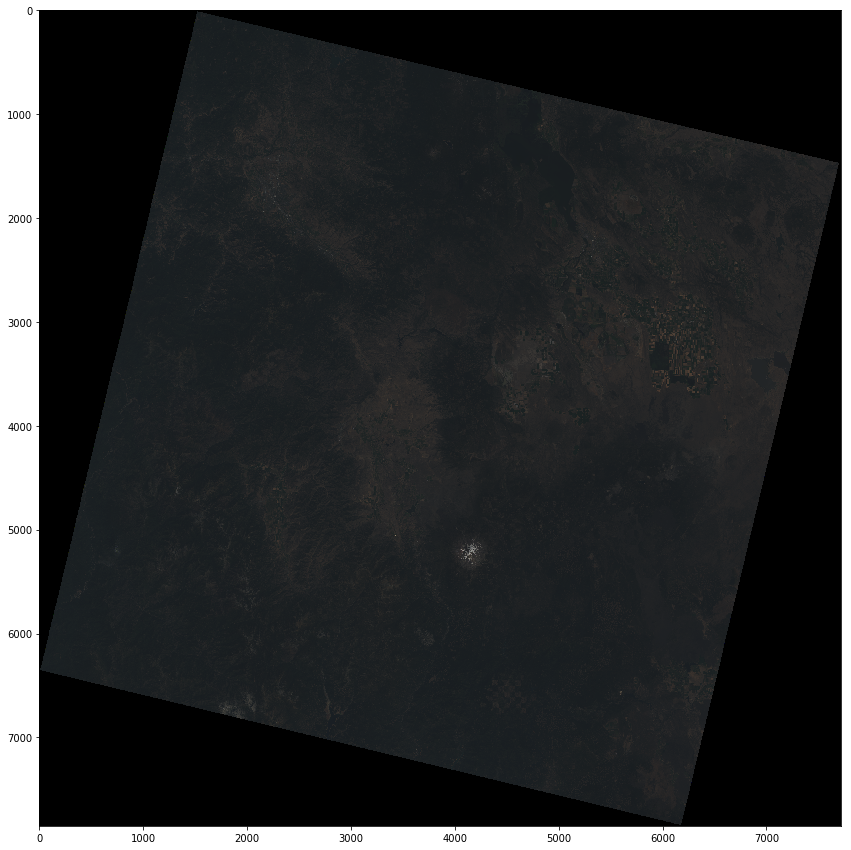

In [66]:
rgb = np.dstack((redn, greenn, bluen))
plt.figure(figsize = (15, 15))
plt.imshow(rgb)

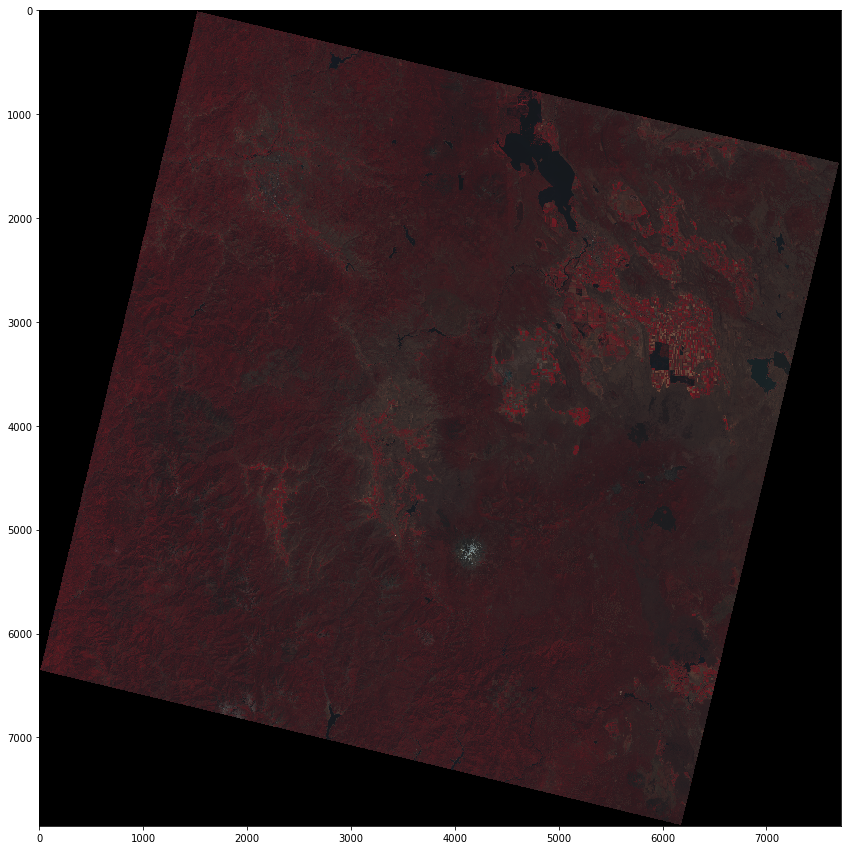

In [69]:
rgb = np.dstack((nirn, redn, greenn))
plt.figure(figsize = (15, 15))
plt.imshow(rgb)